# Задание 1

In [120]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from itertools import cycle, islice,count
from sklearn.metrics import silhouette_score

In [121]:
ds = datasets.make_blobs(n_samples = 1500, centers = 2 , center_box = (-7.5,7.0),cluster_std = [1.4,1.7],random_state=42)

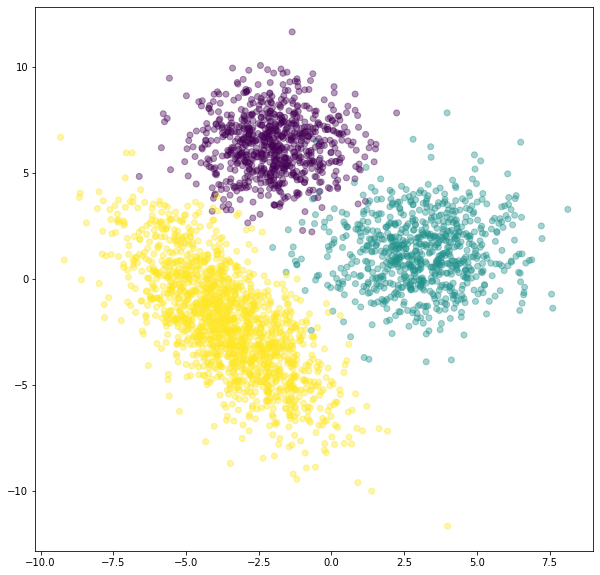

In [122]:
X_2,_= datasets.make_blobs(n_samples = 1500, random_state=170 , centers=[[-4,-3]],cluster_std = [1.4])
transformation=[[1.2,-0.8], [-0.4,1.7]]
X_2 = np.dot(X_2, transformation)
X = np.concatenate((ds[0][:,0], X_2[:,0]))
y = np.concatenate((ds[0][:,1], X_2[:,1]))
color = np.concatenate((ds[1], np.array([2]*len(X_2))))
plt.rcParams['figure.figsize']= 10,10
plt.scatter(X,y,c=color,alpha = 0.4)
X,y,color
dt = np.concatenate([np.reshape(X,(X.shape[0],1)),np.reshape(y,(y.shape[0],1))],axis = 1)

In [123]:
unique, counts=np.unique(color, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

Центроиды:
[3.20844212 1.25447168]
[-2.375875    5.98916061]
[-3.38460635 -2.34689763]


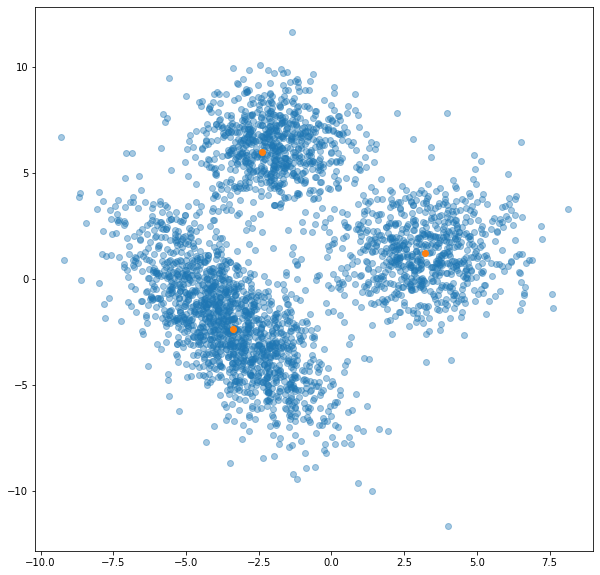

In [124]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, 
                 init='k-means++', # 'k-means++', 'random', numpy.array
                 random_state = 42
                )

k_means.fit(dt)
y_kmeans = k_means.predict(dt)
clusters = k_means.cluster_centers_
print('Центроиды:',*clusters,sep='\n')
plt.scatter(X,y,alpha = 0.4)
plt.scatter(clusters[:,0],clusters[:,1])

Коэффициент силуэта = 0.5565607593618408


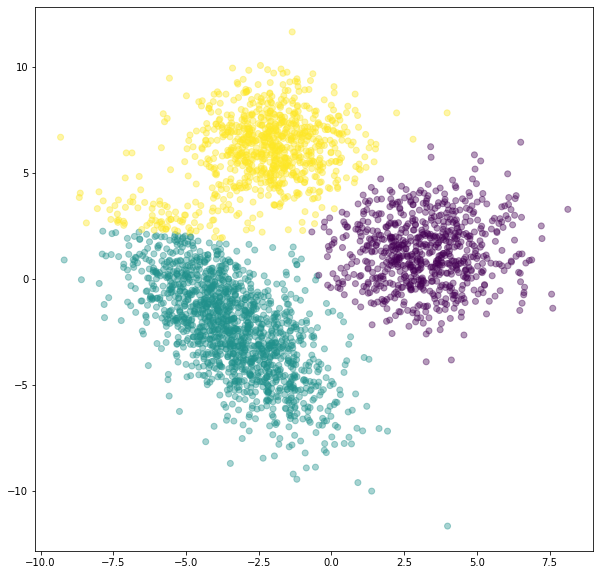

In [125]:
y_km = k_means.fit_predict(dt)
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
plt.scatter(X,y,c=y_km,alpha = 0.4)
k_means_silh_score = silhouette_score(X=dt, labels=y_km, metric='euclidean')
print('Коэффициент силуэта =', k_means_silh_score)

# Задание 2

In [126]:
unique, counts = np.unique(y_km, return_counts=True)
dict(zip(unique, counts))


{0: 724, 1: 1427, 2: 849}

# Задание 3 GaussianMixture

Коэффициент силуэта = 0.5510454622044053


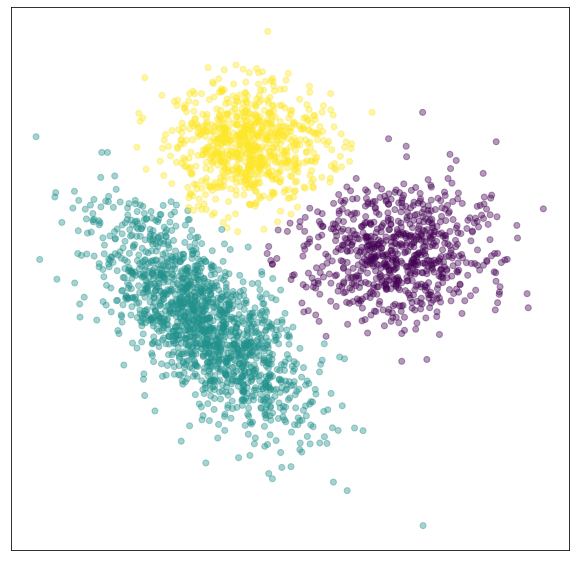

In [127]:
from sklearn import mixture
GM = mixture.GaussianMixture(n_components=3,random_state=42)
GM.fit(dt)
y_pred = GM.predict(dt)

plt.xticks([]); plt.yticks([])
plt.scatter(X,y,c=y_pred,alpha = 0.4)

GM_silh_score = silhouette_score(X=dt, labels=y_pred, metric='euclidean')
print('Коэффициент силуэта =', GM_silh_score)

Центроиды:
[3.1131007  1.24211411]
[-3.55837274 -2.05615535]
[-1.99676245  6.30344946]


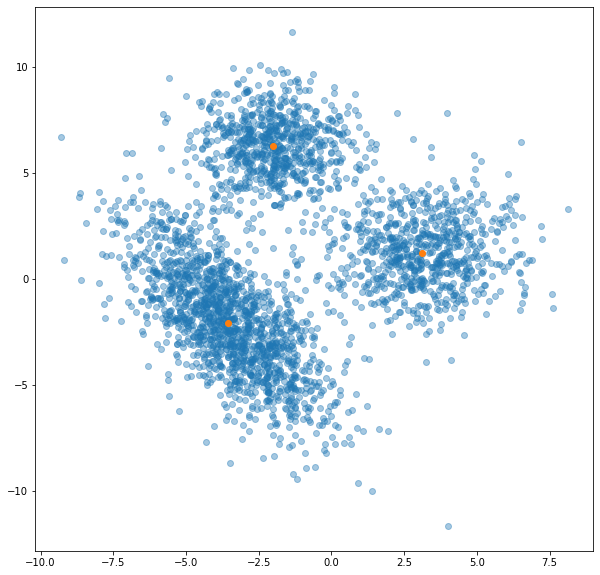

In [128]:
print('Центроиды:',*GM.means_,sep='\n')
plt.scatter(X,y,alpha = 0.4)
plt.scatter(GM.means_[:,0],GM.means_[:,1])


# Задание 4

In [129]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 743, 1: 1498, 2: 759}

# Задание 5

In [130]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(dt)

AgglomerativeClustering(n_clusters=3)

Коэффициент силуэта = 0.5446212848972123


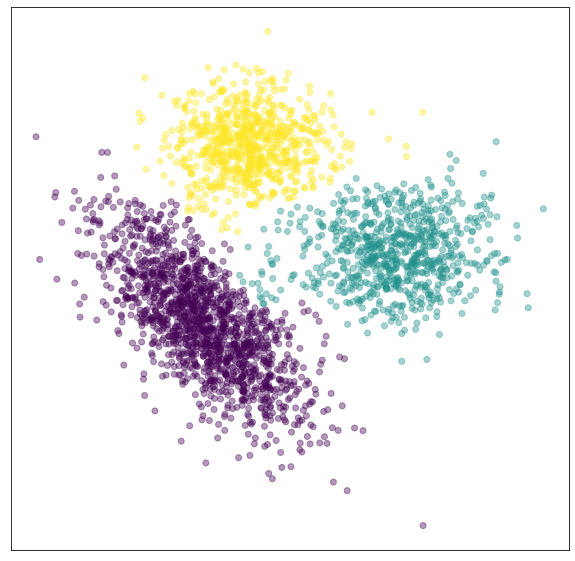

In [131]:
y_pred = ac.labels_.astype(int)

plt.xticks([]); plt.yticks([])


plt.scatter(X,y,c=y_pred,alpha = 0.4)

ac_silh_score = silhouette_score(X=dt, labels=y_pred, metric='euclidean')
print('Коэффициент силуэта =', ac_silh_score)

# Задание 6

In [132]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 1485, 1: 755, 2: 760}

# Задание 7

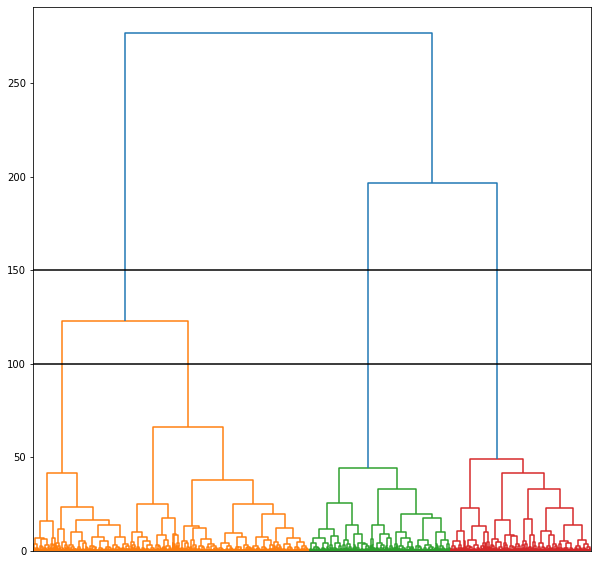

In [134]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
Z = hierarchy.linkage(dt, 'ward') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 10))
dn = hierarchy.dendrogram(Z, no_labels = True)
plt.axhline(150, c='black')
plt.axhline(100, c='black')
plt.show()

# Задание 8

In [135]:
def task8(m):
    l = [max(i) for i in dn['dcoord'] if max(i) > m]    
    return len(l)

In [136]:
print('Кластеров при граничном расстоянии для разделения кластеров 150:', task8(150))
print('Кластеров при граничном расстоянии для разделения кластеров 150:', task8(100))

Кластеров при граничном расстоянии для разделения кластеров 150: 2
Кластеров при граничном расстоянии для разделения кластеров 150: 3


# Задание 9


In [66]:
from sklearn.cluster import DBSCAN

Коэффициент силуэта = 0.5091093090116814


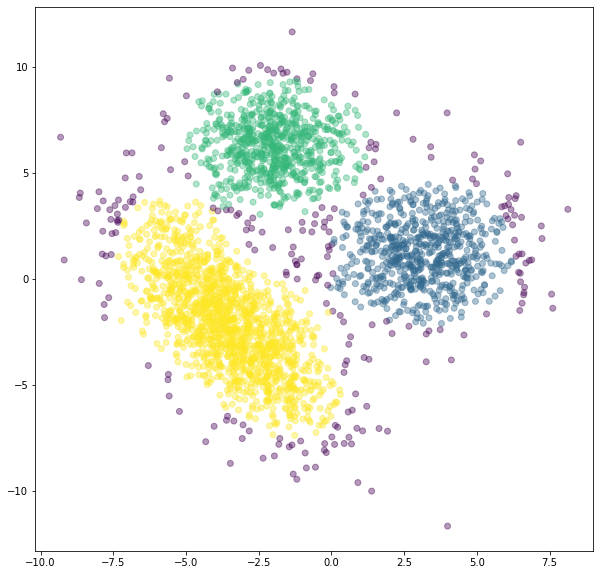

In [137]:
dbscan = DBSCAN(eps=0.9,min_samples=35)

dbscan.fit(dt)
y_pred = dbscan.labels_.astype(int)
plt.scatter(X, y, c=y_pred, alpha = 0.4)
dbscan_silh_score = silhouette_score(X=dt, labels=y_pred, metric='euclidean')
print('Коэффициент силуэта =', dbscan_silh_score)

In [88]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{-1: 354, 0: 603, 1: 674, 2: 1369}

# Задание 10

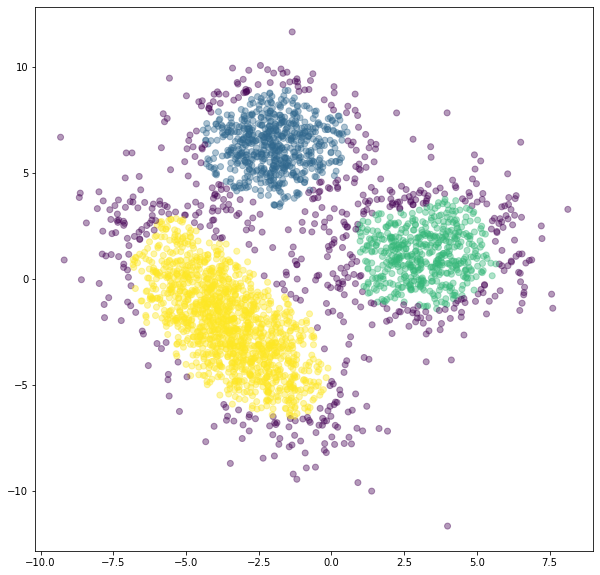

In [91]:
dbscan = DBSCAN(eps=0.7,min_samples=35)

dbscan.fit(dt)
y_pred = dbscan.labels_.astype(int)
plt.scatter(X, y, c=y_pred, alpha = 0.4)

In [90]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{-1: 586, 0: 616, 1: 507, 2: 1291}

# Задание 11 

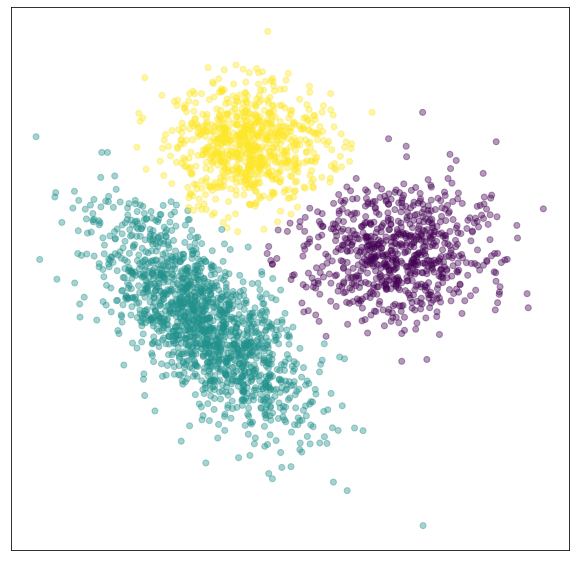

In [196]:
from sklearn import mixture
GM = mixture.GaussianMixture(n_components=3,random_state=42)
GM.fit(dt)
y_pred = GM.predict(dt)

plt.xticks([]); plt.yticks([])
plt.scatter(X,y,c=y_pred,alpha = 0.4)

In [140]:
gm_silh_score = silhouette_score(X=dt, labels=y_pred, metric='euclidean')

print('Коэффициент силуэта =', gm_silh_score)


Коэффициент силуэта = 0.5510454622044053


# Задание 12

In [185]:
res = {'K-means': k_means_silh_score,'EM-алгоритма': gm_silh_score,'Агломеративная кластеризация': ac_silh_score,'DBSCAN': dbscan_silh_score}
print(*[ k +' : '+ str(v) for k,v in res.items()],sep='\n')
print()
print(f'Максимальное значение коэффициента силуэта у {max(res, key=res.get)} со значением {res[max(res, key=res.get)]}')

K-means : 0.5565607593618408
EM-алгоритма : 0.5510454622044053
Агломеративная кластеризация : 0.5446212848972123
DBSCAN : 0.5091093090116814

Максимальное значение коэффициента силуэта у K-means со значением 0.5565607593618408


# Задание 13

In [202]:
res = {'K-means' : {'Значение коэффициента силуэта' : 0, 'Число кластеров': 0},
       'EM-алгоритм': {'Значение коэффициента силуэта' : 0, 'Число кластеров': 0},
       'Агломеративная кластеризация': {'Значение коэффициента силуэта' : 0, 'Число кластеров': 0}
       }

for i in range(2, 11):
    k_means = KMeans(n_clusters=i, random_state=42)
    gm = mixture.GaussianMixture(n_components=i,random_state=42)
    ac = AgglomerativeClustering(n_clusters=i)
    
    k_means.fit(dt)
    gm.fit(dt)
    ac.fit(dt)
    
    ypred_k_means = k_means.labels_.astype(int)
    ypred_gm = gm.predict(dt)
    ypred_ac = ac.labels_.astype(int)
    
    k_means_silh_score = silhouette_score(X=dt, labels=ypred_k_means)
    gm_silh_score = silhouette_score(X=dt, labels=ypred_gm)
    ac_silh_score = silhouette_score(X=dt, labels=ypred_ac)
    
    if res['K-means']['Значение коэффициента силуэта'] < k_means_silh_score:
        res['K-means']['Значение коэффициента силуэта'] = k_means_silh_score
        res['K-means']['Число кластеров'] = i

    if res['EM-алгоритм']['Значение коэффициента силуэта'] <  gm_silh_score:
        res['EM-алгоритм']['Значение коэффициента силуэта'] = gm_silh_score
        res['EM-алгоритм']['Число кластеров'] = i
        
    if res['Агломеративная кластеризация']['Значение коэффициента силуэта'] < ac_silh_score:
        res['Агломеративная кластеризация'][] = ac_silh_score
        res['Агломеративная кластеризация']['Число кластеров'] = i

In [235]:
for i in res.items():
    print(f'Алгоритм : {i[0]}')
    print('Значение коэффициента силуэта:', i[1]['Значение коэффициента силуэта'])
    print('Число кластеров', i[1]['Число кластеров'])
    print()


Алгоритм : K-means
Значение коэффициента силуэта: 0.5565607593618408
Число кластеров 3

Алгоритм : EM-алгоритм
Значение коэффициента силуэта: 0.5510454622044053
Число кластеров 3

Алгоритм : Агломеративная кластеризация
Значение коэффициента силуэта: 0.5446212848972123
Число кластеров 3

